In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

import panel as pn

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/holoviz/panel/master/examples/assets/occupancy.csv')
data['date'] = data.date.astype('datetime64[ns]')
data = data.set_index('date')

data.tail()

Temperature  Humidity  Light         CO2  HumidityRatio  \
date                                                                           
2015-02-10 09:29:00        21.05   36.0975  433.0  787.250000       0.005579   
2015-02-10 09:29:59        21.05   35.9950  433.0  789.500000       0.005563   
2015-02-10 09:30:59        21.10   36.0950  433.0  798.500000       0.005596   
2015-02-10 09:32:00        21.10   36.2600  433.0  820.333333       0.005621   
2015-02-10 09:33:00        21.10   36.2000  447.0  821.000000       0.005612   

                     Occupancy  
date                            
2015-02-10 09:29:00          1  
2015-02-10 09:29:59          1  
2015-02-10 09:30:59          1  
2015-02-10 09:32:00          1  
2015-02-10 09:33:00          1

In [4]:
def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

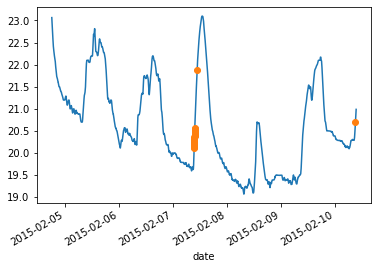

In [5]:
find_outliers(variable='Temperature', window=20, sigma=10)

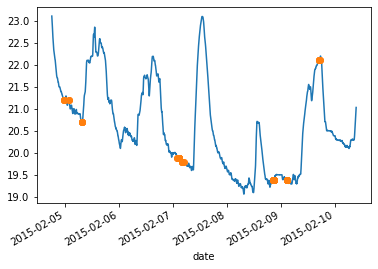

In [8]:
find_outliers(variable='Temperature', window=14, sigma=17)

Column
    [0] Column
        [0] IntSlider(end=90, name='window', start=-30, value=30)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00128')
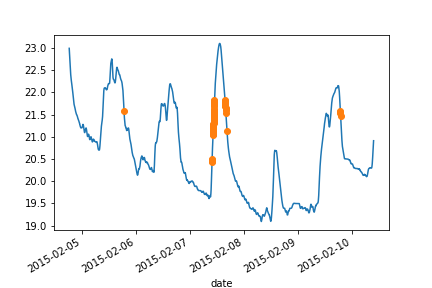

In [10]:
pn.extension()

pn.interact(find_outliers)